# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric (AOV) and the current analysis in general. Support your answers with appropriate visualizations.

- Propose a new metric that better represents the behavior of the stores' customers. Why are these metrics better and what are their values?

- Using the `created_at` column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior.

Show all of your work in this notebook.

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df = pd.read_csv("orders.csv")
df

,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [107]:
# Naive
df["order_value"].mean()

3145.128

## What went wrong with this metric (AOV) and the current analysis in general.

The problem statement seems to imply that there is only one shoe per site, thus if people are buying more than one shoe it's all the same shoe, as long as it's on the same site. By dividing we know that we are getting the price per shoe on this site. We have 5000 entries and we are getting a far greater value than we expect. We see that we must a have lots of outliers, or that this is very skewed. We can show this in a histogram and box plot to see where we lie.

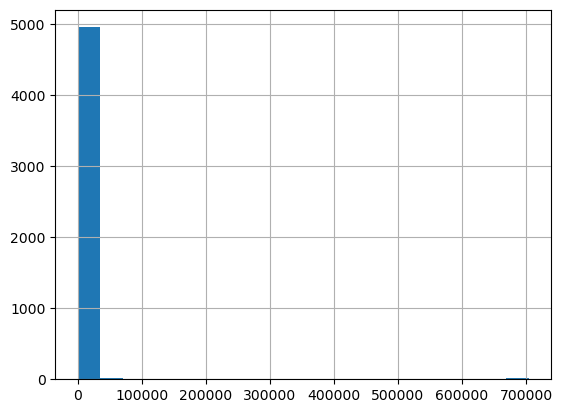

In [108]:
df["order_value"].hist(bins=20);

Based on the histogram alone we can seee a majority of values are in the relatively grouped range of less than \\$50,000. However, we can see a couple orders sprinkled through the x-axis as we see there are even some as high as \\$700,000!!!

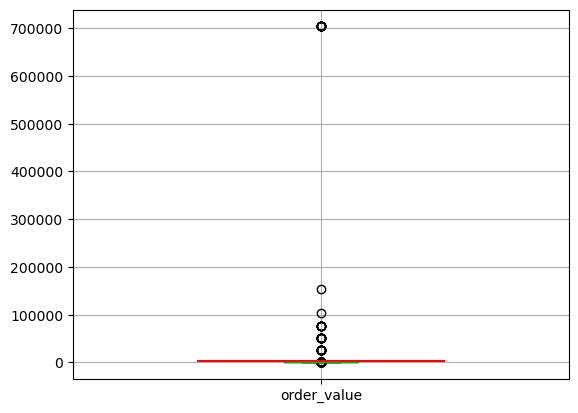

In [109]:
df.boxplot(column="order_value")
plt.hlines(df["order_value"].mean(), xmin=0.75, xmax=1.25, color="red");

Now it becomes much more apparent from our hypothesis from the historgram. We really see one trend in this plot since our box and whiskers are squashed and we can't even see our IQR; we have huge outliers that we didn't expect to get from a sneakers shop. We also see that our mean (marked in red) is also on the lower side, but we are still getting pulled up by these enormous outliers. These people are either buying shoes in bulk or very expensive shoes and massively hurting our mean. If we go a couple more steps, we can see that some people buy thousands of dollars worth of shoes at multiple times.

In [110]:
df.loc[df["order_value"].nlargest(n=30).index]

,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


## Propose a new metric that better represents the behavior of the stores' customers.

Using the **median** should alleviate the AOV phenomenon that we're having if orders is the absolute thing we want to look at. We know that the median is resistant to outliers. We have a couple outliers, but a majority of data points are where we expect, see the above plots. We can quantify the spread of the data set by using the coefficient of variation to measure dispersion.

In [111]:
Q1 = df["order_value"].quantile(0.25)
Q3 = df["order_value"].quantile(0.75)
IQR = Q3 - Q1
median = df["order_value"].median()

filter = (df["order_value"] >= Q1 - 1.5*IQR) & (df["order_value"] <= Q3 + 1.5*IQR)
df_filter = df.loc[filter]

In [112]:
cv_reg = (df["order_value"].std() / df["order_value"].mean()) * 100
cv_filter = (df_filter["order_value"].std() / df_filter["order_value"].mean()) * 100
print(f"Before CV was: {cv_reg}")
print(f"Original median: {median}")
print(f"After CV was: {cv_filter}")
print(f"New median: {df_filter['order_value'].median()}")

Before CV was: 1312.586939189381
Original median: 284.0
After CV was: 49.181421194546594
New median: 280.0


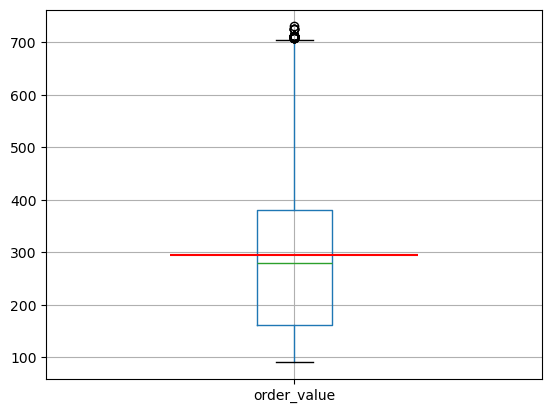

In [113]:
df_filter.boxplot(column="order_value")
plt.hlines(df_filter["order_value"].mean(), xmin=0.75, xmax=1.25, color="red");

After filtering for huge outliers 1.5 the interquartile range, we get something much nicer and we can actually see the trends that we would like to see. We can see the median, and the mean (marked in red). We know that we have fewer values higher than 400 based on the 75th percentile being located slightly under there. All the more reason to use the **median** instead of the mean which was used before. **The original data set without removing outliers like above has a median of \\$284.0** Also to finish the coefficient of variation note from above, we even have a much smaller value after filter for outliers!

## Using the created_at column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior.

In [115]:
df["created_at"] = pd.to_datetime(df["created_at"], format="%Y-%m-%d %H:%M:%S")
time_series = df[["order_value", "created_at"]].sort_values("created_at", ascending=True)
time = df["created_at"]

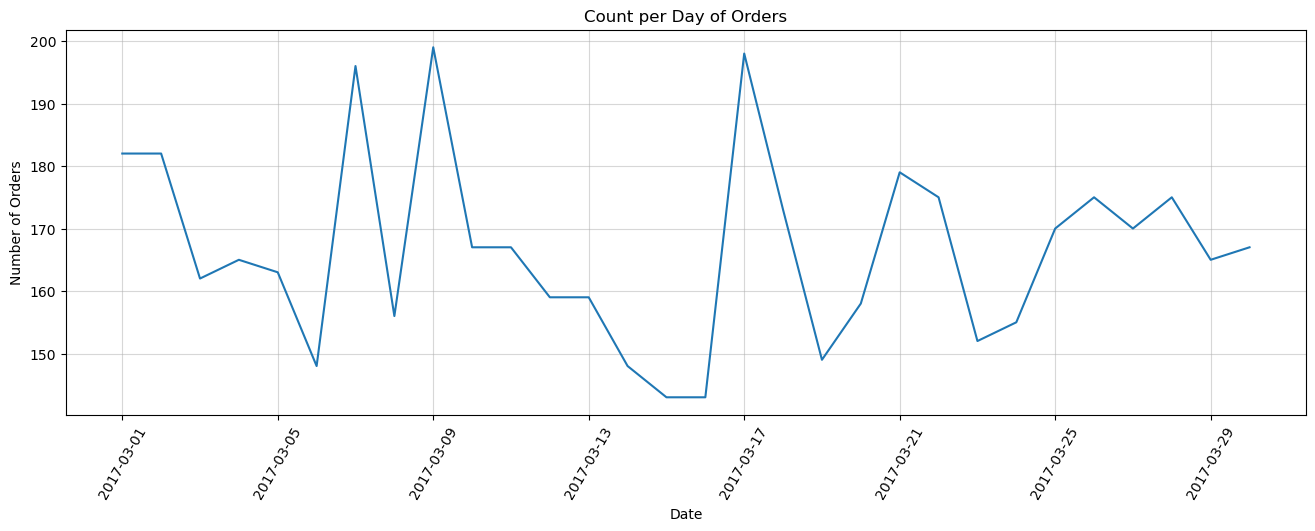

In [116]:
grouped_time = time.groupby(time.dt.floor('d')).size().reset_index(name='count')
fig = plt.subplots(figsize=(16,5))
plt.title("Count per Day of Orders")
plt.plot(grouped_time["created_at"], grouped_time["count"])
plt.grid(True, alpha=0.5)
plt.ylabel('Number of Orders')
plt.xlabel('Date')
plt.xticks(rotation=60);

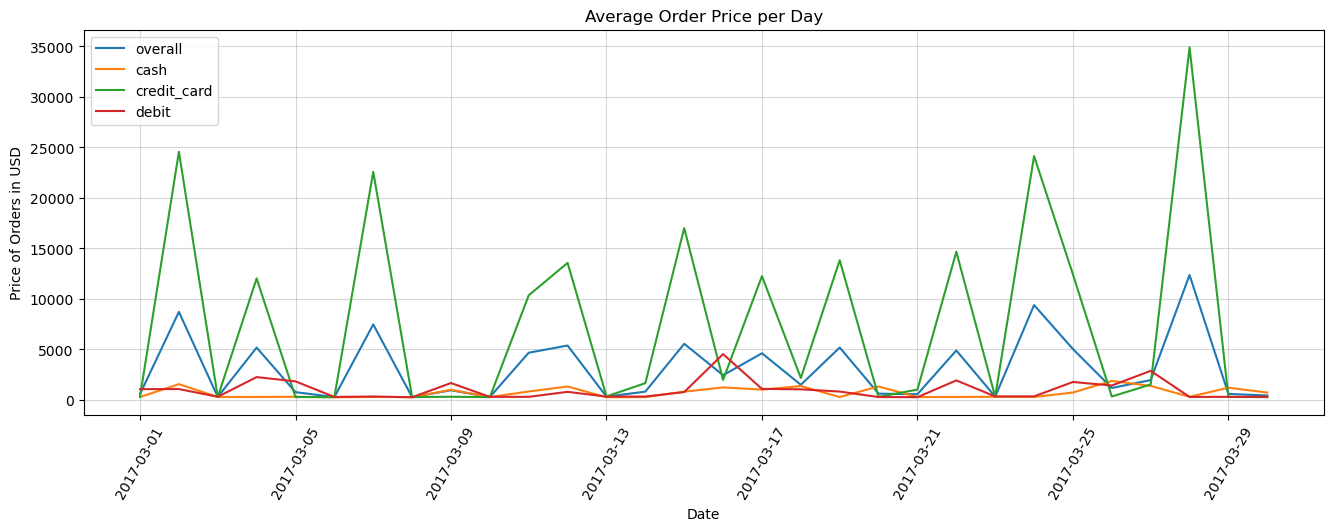

In [130]:
grouped_prices = df.groupby(df["created_at"].dt.floor('d'))["order_value"].mean().reset_index()
grouped = df.groupby([df["created_at"].dt.floor('d'), "payment_method"])["order_value"].mean().reset_index()

fig = plt.subplots(figsize=(16,5))
plt.title("Average Order Price per Day")
plt.plot(grouped_prices["created_at"], grouped_prices["order_value"], label="overall")

for method in grouped["payment_method"].unique():
    pay = grouped[grouped["payment_method"] == method]
    plt.plot(pay["created_at"], pay["order_value"], label=method)

plt.grid(True, alpha=0.5)
plt.ylabel('Price of Orders in USD')
plt.xlabel('Date')
plt.xticks(rotation=60)
plt.legend(loc="best");

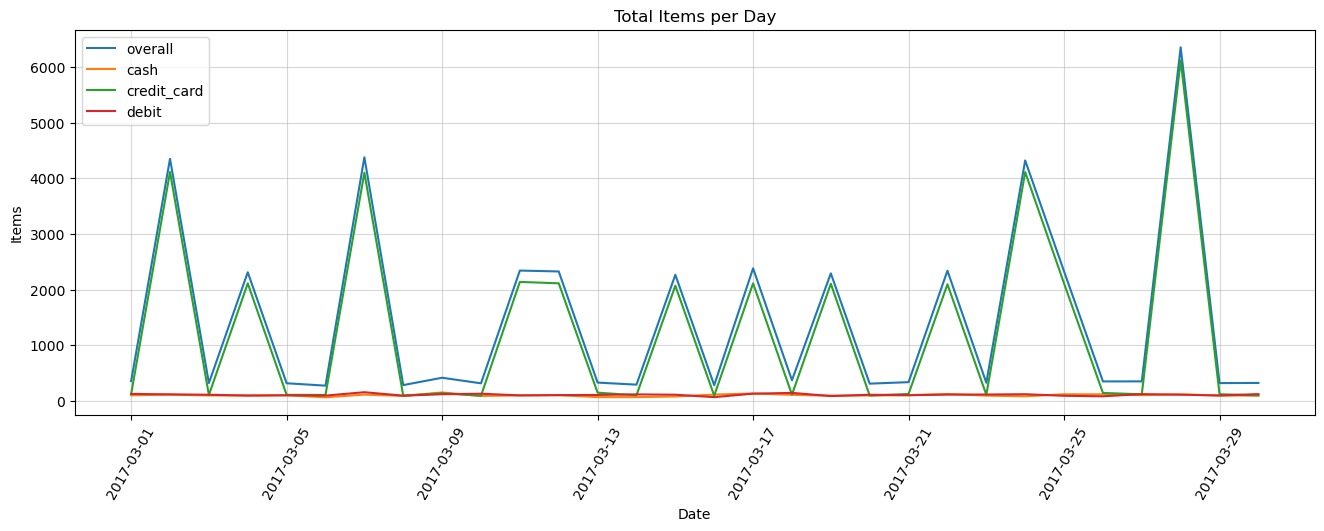

In [132]:
grouped_orders = df.groupby(df["created_at"].dt.floor('d'))["total_items"].sum().reset_index()
grouped = df.groupby([df["created_at"].dt.floor('d'), "payment_method"])["total_items"].sum().reset_index()

fig = plt.subplots(figsize=(16,5))
plt.title("Total Items per Day")
plt.plot(grouped_orders["created_at"], grouped_orders["total_items"], label="overall")

for method in grouped["payment_method"].unique():
    pay = grouped[grouped["payment_method"] == method]
    plt.plot(pay["created_at"], pay["total_items"], label=method)


plt.grid(True, alpha=0.5)
plt.ylabel('Items')
plt.xlabel('Date')
plt.xticks(rotation=60)
plt.legend(loc="best");

We can see that the number of orders per day don't exceed 200 and there is a manageable range across the websites. We also see that the number of orders and the number of items ordered in a day don't really correlate as much, the shapes are all different. Although, some of the peaks lie in the same days so we can make some inferences like maybe there was a sale that day. There is a strange dip in prices towards the end, then it slowly begins to ramp up as the month closes, likely due to sales.

The average order price and total items per day seems like they have similar shapes, since some peaks are in the same location, but we can't be too sure. Peaks appear randomly through the average plot, so we can't really say why. The two largest peaks are located in the beginning and the end of the month, maybe one of these shops also doubles as a manufacturer so they need shoes for the upcoming month. Around the middle of the month we see a dip in sales prices, then it steadily begins to increase as the month finishes off. This is likely because of spring sales (if there are any). Spring starts on the calendar of March 21st, so it's likely there are compnany shoe sales around that time and people buy them. Most notably in the graph, credit cards are consistently our biggest spenders, so if we were hired by these shoe sites we could recommend cash back with credit cards.

Lastly total items a day is somewhat a meld between the previous two. 